In [2]:
import pandas as pd
import math
from scipy.stats import norm
import scipy
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import gc
# gc.collect()

0

# 1. Import Data

In [6]:
##import data
df_Test_Overall = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\MTA AB Visit Data Test1_2.csv', index_col = 0)
df_testgroupmapping= pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\MTA AB Test Group Map.csv')
df_test_overlapped=pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\MTA AB Visit Data Test 3 -- overlapped.csv')
df_rev = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\MTA AB Rev Data.csv')

C:\Users\ruiya\Anaconda3\python\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# 2. Test 1 & Test 3 (merge with Rev & testGroupID)

In [12]:
df_test_1 = df_Test_Overall[df_Test_Overall['testid'] == 1]
df_test_1['Date'] = pd.to_datetime(df_test_1['Date'], format = '%Y-%m-%d')

df_test_1=pd.merge(df_test_1, df_testgroupmapping, on=['SessionID','ControlGroup'], how = 'inner')

df_test_1=pd.merge(df_test_1, df_rev, on=['testid','SessionID','ControlGroup'], how = 'left')
df_test_1.drop('"Date"', axis = 1, inplace = True)

C:\Users\ruiya\Anaconda3\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df_test_1

,testid,ControlGroup,Date,SessionID,ChannelID,CategoryID,PlatformID,CusID,VisitorTypeID,Time,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted,TestGroupID,TotalRevenue
0,1,0,2019-05-11,2951132864593557469,665,3,1,1494544794292136396,4,2,1,1,0,0,0,1,NaN
1,1,0,2019-05-11,7138615966941434652,665,3,1,1435751567551074226,3,8818,0,1,0,0,0,1,NaN
2,1,1,2019-05-11,6800287232486214150,1538,1,1,4720945341961963682,4,907,0,1,1,0,0,0,NaN
3,1,0,2019-05-11,2360306211228912861,444,1,1,6871171146099668088,4,72,1,0,0,0,0,2,NaN
4,1,1,2019-05-11,5437030987425879071,225,1,1,7215758674942437739,4,73,0,0,0,0,0,0,NaN
5,1,1,2019-05-11,3934142422156823462,235,1,1,6079576280879750620,4,11,1,0,0,0,0,0,NaN
6,1,0,2019-05-11,4904688268097587945,431,3,1,2002898606771721778,4,62,1,1,0,0,0,1,NaN
7,1,1,2019-05-11,254580880972090780,336,1,1,4388066229088526147,4,389,0,1,0,0,0,0,NaN
8,1,0,2019-05-11,6220357675644274161,235,1,1,8115412130493990675,4,228,0,1,0,0,0,1,NaN
9,1,1,2019-05-11,7548469418795812896,336,1,1,2381954597108138821,3,1126,0,1,0,0,0,0,NaN


In [4]:
df_test_3=df_test_overlapped
df_test_3['Date'] = pd.to_datetime(df_test_3['Date'], format = '%Y-%m-%d')

# update 'testid' to id = 3
df_test_3['testid'] = 3

In [6]:
df_test_3.head()

,testid,ControlGroup,Date,SessionID,Channel,CategoryID,PlatformID,CusID,VisitorTypeID,SecondsOnSite,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted,TotalRevenue
0,3,1,2019-04-12,3533501021648118454,626,3,1,5691554565265139480,4,6,0,0,0,0,0,0.0
1,3,0,2019-04-12,3584685757574086127,336,1,1,1201554244615674082,4,6562,0,1,1,0,0,0.0
2,3,1,2019-04-28,695202335434623794,611,4,1,7596685390736687343,3,2490,0,1,0,0,0,0.0
3,3,1,2019-04-28,5218780436975986213,2708,1,1,5482698072272493817,2,237,1,0,0,0,0,0.0
4,3,1,2019-04-28,2013133915126740983,722,1,1,8916061606676482643,4,916,0,1,0,0,0,0.0


# 3. Clean Data - Check Traffic Flow

In [7]:
df_test_1.groupby(['Date'])['SessionID'].count()

Date
2019-04-12        52
2019-04-13     55269
2019-04-14     86636
2019-04-15     95337
2019-04-16    105817
2019-04-17    126958
2019-04-18    131886
2019-04-19    147524
2019-04-20    140351
2019-04-21    136837
2019-04-22    136907
2019-04-23    153222
2019-04-24    189258
2019-04-25    170152
2019-04-26    169986
2019-04-27    172537
2019-04-28    167252
2019-04-29    166272
2019-04-30    186939
2019-05-01    243291
2019-05-02    219812
2019-05-03    206435
2019-05-04    207144
2019-05-05    196336
2019-05-06    177694
2019-05-07    203407
2019-05-08    248663
2019-05-09    225336
2019-05-10    223806
2019-05-11    219000
2019-05-12    205723
2019-05-13    181339
2019-05-14    207424
2019-05-15    248524
2019-05-16    236847
2019-05-17    250145
2019-05-18    235630
2019-05-19    222969
2019-05-20    200257
2019-05-21     95774
Name: SessionID, dtype: int64

In [8]:
df_test_3.groupby(['Date'])['SessionID'].count()

Date
2019-04-12        50
2019-04-13     48708
2019-04-14    113536
2019-04-15    127780
2019-04-16    141973
2019-04-17    168183
2019-04-18    173685
2019-04-19    193420
2019-04-20    183244
2019-04-21    178813
2019-04-22    179924
2019-04-23    201651
2019-04-24    245919
2019-04-25    220206
2019-04-26    219591
2019-04-27    221737
2019-04-28    214931
2019-04-29    215352
2019-04-30    242146
2019-05-01    312431
2019-05-02    281269
2019-05-03    263011
2019-05-04    263748
2019-05-05    249287
2019-05-06    227808
2019-05-07    260838
2019-05-08    315401
2019-05-09    286028
2019-05-10    122141
Name: SessionID, dtype: int64

In [5]:
df_test_1 = df_test_1[(df_test_1['Date'] >= dt.datetime(2019,4,15)) & (df_test_1['Date'] <= dt.datetime(2019,5,20))]
df_test_3 = df_test_3[(df_test_3['Date'] >= dt.datetime(2019,4,15)) & (df_test_3['Date'] <= dt.datetime(2019,5,9))]
df_test_1.shape, df_test_3.shape

((6757017, 17), (5588376, 16))

# 4. Aggregate Data

In [10]:
test_num = int(input('Choose TestID. Type [1/3]'))

Choose TestID. Type [1/3]3


In [11]:
if test_num == 1:
    df_Test = df_test_1
    groupby_col = 'TestGroupID'
elif test_num == 3:
    df_Test = df_test_3
    groupby_col = 'ControlGroup'

In [14]:
# Each session will be randomly assigned to a test group (a customer may has been assgiend to different test groups)

In [8]:
def z_test_calculator(df,denominator,numerator):
    
#   INPUT:
#        df: dataframe with aggregated data
#        denominator: str
#        numerator: str

#   OUTPUT: 
#        (denominator, numerator, p_value, pct_lift, abs_lift)

    # get data
    nume_ctrl = df.loc[0, numerator]
    deno_ctrl = df.loc[0, denominator]
    nume_var = df.loc[1, numerator]
    deno_var = df.loc[1, denominator]


    # p
    p_ctrl = nume_ctrl / deno_ctrl
    p_var  = nume_var / deno_var

    # STD
    std_ctrl = math.sqrt(p_ctrl * (1 - p_ctrl) / deno_ctrl)
    std_var = math.sqrt(p_var * (1 - p_var) / deno_var)

    # Z-Score
    z = (p_ctrl - p_var) / math.sqrt(std_ctrl**2 + std_var**2)

    # P Value
    p = 1-norm.sf(abs(z))

    # Lift
    abs_lift = p_var - p_ctrl
    pct_lift = abs_lift / p_ctrl
    
    return denominator, numerator, p, pct_lift, abs_lift

In [16]:
for level in ['SessionID','CusID']:
    print(level, 'Level: ')

    # Clarify Metrics
    metrics=['Bounced', 'SawProduct', 'AddedToCart', 'ReachedCheckout', 'Converted']
    KPIs=[
        (level, 'Bounced'),
        (level, 'SawProduct'),
        (level, 'AddedToCart'),
        (level, 'ReachedCheckout'),
        (level, 'Converted'),
        ('SawProduct','Bounced'),
        ('SawProduct','AddedToCart'),
        ('AddedToCart','ReachedCheckout'),
        ('ReachedCheckout','Converted')]
    
    # Aggregation: # of level for each Test Group
    df_Result = pd.DataFrame(df_Test.drop_duplicates([level, groupby_col]).groupby(groupby_col)[level].count())
    

    # Aggregation: # of 'metric' for each Test Group
    for metric in metrics:
        df_Result[metric] = df_Test[df_Test[metric]==1].drop_duplicates([level,groupby_col]).groupby(groupby_col)[metric].count()
    # print(df_Result)


    dic_final = {}
    for i in df_Result.index:
        if i != 0:
            test_group_n = df_Result.loc[[0, i],]
            test_group_n.index = [0,1]

            groupN_statistics = []
            for j in KPIs:
                groupN_statistics.append(z_test_calculator(test_group_n, j[0],j[1]))
            key = 'TestGroup {} - {} Level'.format(i, level)
            dic_final[key] = pd.DataFrame.from_records(groupN_statistics, columns = ['denominator','numerator',
                                                                                     'Confident Level','perc_lift','abs_lift'])
    print(dic_final)
    
    
    ##output to csv
    writer = pd.ExcelWriter('./v2/Test {} - {} Level Overall.xlsx'.format(test_num,level))
    for key in dic_final.keys():
        dic_final[key].to_excel(writer, sheet_name=key)
    writer.save()
    print('-------------------------------------------------------------------------------')

SessionID Level: 
{'TestGroup 1 - SessionID Level':        denominator        numerator  Confident Level  perc_lift  abs_lift
0        SessionID          Bounced         0.995141  -0.004413 -0.000869
1        SessionID       SawProduct         0.859786   0.000544  0.000402
2        SessionID      AddedToCart         0.883762  -0.001548 -0.000462
3        SessionID  ReachedCheckout         0.675018   0.000957  0.000133
4        SessionID        Converted         0.686622   0.001235  0.000123
5       SawProduct          Bounced         0.998813  -0.004954 -0.001323
6       SawProduct      AddedToCart         0.960041  -0.002091 -0.000846
7      AddedToCart  ReachedCheckout         0.934335   0.002508  0.001166
8  ReachedCheckout        Converted         0.577920   0.000278  0.000200}
-------------------------------------------------------------------------------
CusID Level: 
{'TestGroup 1 - CusID Level':        denominator        numerator  Confident Level  perc_lift  abs_lift
0        

# 5. Deep Dive - Cut 

In [30]:
cut = input('choose dimension to cut: [VisitorTypeID/CategoryID/PlatformID]:   ')

choose dimension to cut: [VisitorTypeID/CategoryID/PlatformID]:   CategoryID


In [31]:
# VisitorTypeID，  CategoryID， PlatformID
##did not covered in class but you could use this code for cuts
dic_final={}
for level in ['SessionID', 'CusID']:
    
    KPIs=[
        (level, 'Bounced'),
        (level, 'SawProduct'),
        (level, 'AddedToCart'),
        (level, 'ReachedCheckout'),
        (level, 'Converted'),
        ('SawProduct','Bounced'),
        ('SawProduct','AddedToCart'),
        ('AddedToCart','ReachedCheckout'),
        ('ReachedCheckout','Converted')]
    
    for p in set(df_Test[cut]):
        df_Test1=df_Test[df_Test[cut]==p]
        df_Result_cut=pd.DataFrame(df_Test1.drop_duplicates([level, groupby_col]).groupby(groupby_col)[level].count())
        
        for metric in metrics:
            df_Result_cut[metric]=df_Test1[df_Test1[metric]==1].drop_duplicates([level, groupby_col]).groupby(groupby_col)[level].count()

        for i in df_Result_cut.index:
            if i != 0:
                test_group_n = df_Result_cut.loc[[0, i],]
                test_group_n.index = [0,1]

                groupN_statistics = []
                for j in KPIs:
                    groupN_statistics.append(z_test_calculator(test_group_n, j[0],j[1]))
                key = 'TG{} - {} Level - Type{}'.format(int(i), level, int(p))
                dic_final[key] = pd.DataFrame.from_records(groupN_statistics, columns = ['denominator','numerator',
                                                                                         'Confident Level','perc_lift',
                                                                                         'abs_lift'])
print(dic_final)

{'TG1 - SessionID Level - Type1':        denominator        numerator  Confident Level  perc_lift  abs_lift
0        SessionID          Bounced         0.999969  -0.009922 -0.001552
1        SessionID       SawProduct         0.895202   0.001004  0.000643
2        SessionID      AddedToCart         0.509169  -0.000037 -0.000011
3        SessionID  ReachedCheckout         0.687199  -0.001216 -0.000189
4        SessionID        Converted         0.572888  -0.000554 -0.000062
5       SawProduct          Bounced         0.999998  -0.010915 -0.002666
6       SawProduct      AddedToCart         0.773868  -0.001040 -0.000501
7      AddedToCart  ReachedCheckout         0.731231  -0.001179 -0.000593
8  ReachedCheckout        Converted         0.651396   0.000662  0.000475, 'TG1 - SessionID Level - Type2':        denominator        numerator  Confident Level  perc_lift  abs_lift
0        SessionID          Bounced         0.906324  -0.006280 -0.001638
1        SessionID       SawProduct         

In [32]:
writer = pd.ExcelWriter('./v2/Cut by {} - Test {} - {} Level Overall.xlsx'.format(cut, test_num,level))
for key in dic_final.keys():
    dic_final[key].to_excel(writer, sheet_name=key)
writer.save()

In [35]:
df_test_1.columns, df_test_3.columns

(Index(['testid', 'ControlGroup', 'Date', 'SessionID', 'ChannelID',
        'CategoryID', 'PlatformID', 'CusID', 'VisitorTypeID', 'Time', 'Bounced',
        'SawProduct', 'AddedToCart', 'ReachedCheckout', 'Converted',
        'TestGroupID', 'TotalRevenue'],
       dtype='object'),
 Index(['testid', 'ControlGroup', 'Date', 'SessionID', 'Channel', 'CategoryID',
        'PlatformID', 'CusID', 'VisitorTypeID', 'SecondsOnSite', 'Bounced',
        'SawProduct', 'AddedToCart', 'ReachedCheckout', 'Converted',
        'TotalRevenue'],
       dtype='object'))

# 6. Multivariate Analysis

In [9]:
df_test_1['CusID'] = df_test_1['CusID'].apply(lambda x: "{:.0f}".format(x))
df_test_3['CusID'] = df_test_3['CusID'].apply(lambda x: "{:.0f}".format(x))


C:\Users\ruiya\Anaconda3\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
gc.collect()

280

## a. 1c3cv

In [33]:
df_test_13 = pd.merge(df_test_1, df_test_3, on = ['SessionID','CusID'], suffixes=('_1','_3'), how = 'right')
print('Test 1 & 3 right merge: ',df_test_13.shape)
print('Test 1 variance: ',df_test_13[df_test_13['TestGroupID'].isin([1,2])].shape)

Test 1 & 3 right merge:  (5588376, 31)
Test 1 variance:  (2867166, 31)


In [34]:
df_test_1c3cv = df_test_13[~df_test_13['TestGroupID'].isin([1,2])]

print('Test 1 Control & Test 3 Control + Variance: ',df_test_1c3cv.shape)

Test 1 Control & Test 3 Control + Variance:  (2721210, 31)


In [37]:
df_test_1c3cv.groupby(['ControlGroup_3','VisitorTypeID_3'])['SessionID'].count()

ControlGroup_3  VisitorTypeID_3
0               1                   43174
                2                  135192
                3                  258443
                4                  853852
1               1                   43198
                2                  137110
                3                  284559
                4                  965682
Name: SessionID, dtype: int64

In [105]:
# When it comes to category, traffic of test3 was unevenly sampled.
# To make sure our data is reliable, we will not analyze the performance cutting by category.
df_test_1c3cv.groupby(['ControlGroup_3','CategoryID_1'])['SessionID'].count()

ControlGroup_3  CategoryID_1
0               1.0              46365
                2.0               5964
                3.0               5044
                4.0               4462
                5.0               8289
1               1.0             853493
                2.0             122221
                3.0             108847
                4.0              91246
                5.0             188991
Name: SessionID, dtype: int64

### Tease out outliers

In [84]:
# Devided the control and vaiation group
Control_Rev = df_test_1c3cv[(df_test_1c3cv['ControlGroup_3'] == 1) & (df_test_1c3cv['TotalRevenue_3']>0)]['TotalRevenue_3']
Var1_Rev = df_test_1c3cv[(df_test_1c3cv['ControlGroup_3'] == 0) & (df_test_1c3cv['TotalRevenue_3']>0)]['TotalRevenue_3']

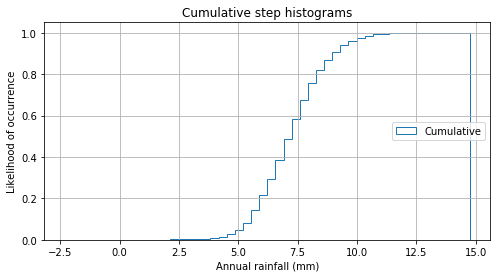

In [85]:
x = Var1_Rev.apply(lambda x: math.log(x,2))
n_bins = 50
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Cumulative')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

### Mann Whitney U tests

In [101]:
# Test 3 revenue p-value
P1 = np.percentile(Control_Rev,99.9)
P2 = np.percentile(Var1_Rev,99.9)

print(Control_Rev[Control_Rev<P1].mean(),Var1_Rev[Var1_Rev<P2].mean())

scipy.stats.mannwhitneyu(Control_Rev[Control_Rev<P1],Var1_Rev[Var1_Rev<P2],use_continuity=False,alternative=None)

## b. 1cv3c

In [11]:
df_test_1cv3c = pd.merge(df_test_1, df_test_3, on = ['SessionID','CusID'], suffixes=('_1','_3'), how = 'left')
print('Test 1 & 3 left merge: ',df_test_1cv3c.shape)
df_test_1cv3c = df_test_1cv3c[df_test_1cv3c['ControlGroup_3'] != 0]
print('Get rid of test 3 variance: ',df_test_1cv3c.shape)

Test 1 & 3 left merge:  (6757017, 31)
Get rid of test 3 variance:  (5189870, 31)


In [12]:
# Traffic from test 1 has been assigned unevenly. Especially for the variation group 2.
#  We may not go deep dive on the variation group 2 in this case.
df_test_1cv3c.groupby(['TestGroupID'])['SessionID'].count()

TestGroupID
0.0    2183870
1.0    2181425
2.0     824575
Name: SessionID, dtype: int64

In [36]:
df_test_1cv3c.head()

,testid_1,ControlGroup_1,Date_1,SessionID,ChannelID,CategoryID_1,PlatformID_1,CusID,VisitorTypeID_1,Time,...,CategoryID_3,PlatformID_3,VisitorTypeID_3,SecondsOnSite,Bounced_3,SawProduct_3,AddedToCart_3,ReachedCheckout_3,Converted_3,TotalRevenue_3
0,1,0,2019-05-11,2951132864593557469,665.0,3.0,1.0,1494544794292136448,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,2019-05-11,7138615966941434652,665.0,3.0,1.0,1435751567551074304,3.0,8818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2019-05-11,6800287232486214150,1538.0,1.0,1.0,4720945341961963520,4.0,907.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,2019-05-11,2360306211228912861,444.0,1.0,1.0,6871171146099667968,4.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2019-05-11,5437030987425879071,225.0,1.0,1.0,7215758674942437376,4.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# Check the sample distribution among each test group
df_test_1cv3c.groupby(['TestGroupID','VisitorTypeID_1'])['SessionID'].count()

TestGroupID  VisitorTypeID_1
0.0          1.0                  52439
             2.0                 195862
             3.0                 423052
             4.0                1512517
1.0          1.0                  52033
             2.0                 195524
             3.0                 420411
             4.0                1513457
2.0          1.0                  15294
             2.0                  67262
             3.0                 150834
             4.0                 591185
Name: SessionID, dtype: int64

In [107]:
# Check the sample distribution among each test group
df_test_1cv3c.groupby(['TestGroupID','CategoryID_1'])['SessionID'].count()

TestGroupID  CategoryID_1
0.0          1.0             1356807
             2.0              198698
             3.0              177741
             4.0              146315
             5.0              304309
1.0          1.0             1358997
             2.0              199203
             3.0              175398
             4.0              145879
             5.0              301948
2.0          1.0              508994
             2.0               75873
             3.0               69009
             4.0               55139
             5.0              115560
Name: SessionID, dtype: int64

### Tease out outliers

In [14]:
# Get revenue for control, variation 1 & variation 2 group
Control_Rev = df_test_1cv3c[(df_test_1cv3c['ControlGroup_1'] == 1) & (df_test_1cv3c['TotalRevenue_1']>0)]['TotalRevenue_1']

Var1_Rev = df_test_1cv3c[(df_test_1cv3c['TestGroupID'] == 1) & (df_test_1cv3c['TotalRevenue_1']>0)]['TotalRevenue_1']

Var2_Rev = df_test_1cv3c[(df_test_1cv3c['TestGroupID'] == 2) & (df_test_1cv3c['TotalRevenue_1']>0)]['TotalRevenue_1']

In [17]:
print(Control_Rev.mean(),Var1_Rev.mean(),Var2_Rev.mean())

285.74794026307524 284.9491381850026 293.0066081889991


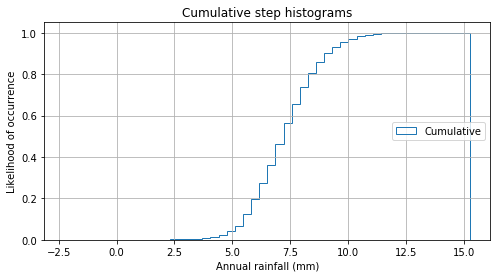

In [30]:
x = Var2_Rev.apply(lambda x: math.log(x,2))
n_bins = 50
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Cumulative')
# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')
plt.show()

### Mann Whitney U tests

In [27]:
# Test 3 revenue p-value
P1 = np.percentile(Control_Rev,99.9)
P2 = np.percentile(Var1_Rev,99.9)
P3 = np.percentile(Var2_Rev,99.9)

print(Control_Rev[Control_Rev<P1].mean(), Var1_Rev[Var1_Rev<P2].mean(), Var2_Rev[Var2_Rev<P3].mean())

scipy.stats.mannwhitneyu(Control_Rev[Control_Rev<P1],Var1_Rev[Var1_Rev<P2],use_continuity=False,alternative=None)


279.0412345073599 278.12037762185736 285.26025480918787


MannwhitneyuResult(statistic=20706508582.0, pvalue=0.0356902864983075)

In [34]:
scipy.stats.mannwhitneyu(Control_Rev[Control_Rev<P1],Var2_Rev[Var2_Rev<P3],use_continuity=False,alternative=None)

MannwhitneyuResult(statistic=6655987459.5, pvalue=0.0017860294111736545)

### by session and cusID level

In [13]:
df_Test = df_test_1cv3c
# groupby_col = 'ControlGroup_3'
groupby_col = 'TestGroupID'
test_num = 1

In [28]:
for level in ['SessionID','CusID']:
    print(level, 'Level: ')

    # Clarify Metrics
    metrics=['Bounced_{}'.format(test_num), 'SawProduct_{}'.format(test_num), 'AddedToCart_{}'.format(test_num), 
             'ReachedCheckout_{}'.format(test_num), 'Converted_{}'.format(test_num)]
    KPIs=[
        (level, metrics[0]),
        (level, metrics[1]),
        (level, metrics[2]),
        (level, metrics[3]),
        (level, metrics[4]),
        (metrics[1],metrics[0]),
        (metrics[1],metrics[2]),
        (metrics[2],metrics[3]),
        (metrics[3],metrics[4])]
    
    # Aggregation: # of level for each Test Group
    df_Result = pd.DataFrame(df_Test.drop_duplicates([level, groupby_col]).groupby(groupby_col)[level].count())
    

    # Aggregation: # of 'metric' for each Test Group
    for metric in metrics:
        df_Result[metric] = df_Test[df_Test[metric]==1].drop_duplicates([level,groupby_col]).groupby(groupby_col)[metric].count()
    print(df_Result)


    dic_final = {}
    for i in df_Result.index:
        if i != 0:
            test_group_n = df_Result.loc[[0, i],]
            test_group_n.index = [0,1]

            groupN_statistics = []
            for j in KPIs:
                groupN_statistics.append(z_test_calculator(test_group_n, j[0],j[1]))
            key = 'TestGroup {} - {} Level'.format(i, level)
            dic_final[key] = pd.DataFrame.from_records(groupN_statistics, columns = ['denominator','numerator',
                                                                                     'Confident Level','perc_lift','abs_lift'])
    print(dic_final)
    
    
    ##output to csv
#     writer = pd.ExcelWriter('./v2/Multivariate - Test {} - {} Level Overall.xlsx'.format(test_num,level))
#     for key in dic_final.keys():
#         dic_final[key].to_excel(writer, sheet_name=key)
#     writer.save()
#     print('-------------------------------------------------------------------------------')

SessionID Level: 
             SessionID  Bounced_1  SawProduct_1  AddedToCart_1  \
TestGroupID                                                      
0.0            2183870     448738       1594804         614932   
1.0            2181425     447006       1590699         615468   
2.0             824575     183323        584923         199496   

             ReachedCheckout_1  Converted_1  
TestGroupID                                  
0.0                     287341       205826  
1.0                     286758       205048  
2.0                      93464        66155  
{'TestGroup 1.0 - SessionID Level':          denominator          numerator  Confident Level  perc_lift  abs_lift
0          SessionID          Bounced_1         0.927594  -0.002743 -0.000564
1          SessionID       SawProduct_1         0.993812  -0.001456 -0.001063
2          SessionID      AddedToCart_1         0.903772   0.001993  0.000561
3          SessionID  ReachedCheckout_1         0.644407  -0.000910 -0.00

### cut

In [25]:
cut = input('choose dimension to cut: [VisitorTypeID_1/CategoryID_1/PlatformID_1]:   ')

# VisitorTypeID，  CategoryID， PlatformID
##did not covered in class but you could use this code for cuts
dic_final={}
for level in ['SessionID', 'CusID']:
    print(level, '-------------------------------------------------------------------------------------------------')
    # Clarify Metrics
    metrics=['Bounced_{}'.format(test_num), 'SawProduct_{}'.format(test_num), 'AddedToCart_{}'.format(test_num), 
             'ReachedCheckout_{}'.format(test_num), 'Converted_{}'.format(test_num)]
    KPIs=[
        (level, metrics[0]),
        (level, metrics[1]),
        (level, metrics[2]),
        (level, metrics[3]),
        (level, metrics[4]),
        (metrics[1],metrics[0]),
        (metrics[1],metrics[2]),
        (metrics[2],metrics[3]),
        (metrics[3],metrics[4])]
    
    for p in set(df_Test[cut]):
        df_Test1=df_Test[df_Test[cut]==p]
        df_Result_cut=pd.DataFrame(df_Test1.drop_duplicates([level, groupby_col]).groupby(groupby_col)[level].count())
        
        for metric in metrics:
            df_Result_cut[metric]=df_Test1[df_Test1[metric]==1].drop_duplicates([level, groupby_col]).groupby(groupby_col)[level].count()

        for i in df_Result_cut.index:
            if i != 0:
                test_group_n = df_Result_cut.loc[[0, i],]
                test_group_n.index = [0,1]

                groupN_statistics = []
                for j in KPIs:
                    groupN_statistics.append(z_test_calculator(test_group_n, j[0],j[1]))
                key = 'TG{} - {} Level - Type{}'.format(int(i), level, int(p))
                dic_final[key] = pd.DataFrame.from_records(groupN_statistics, columns = ['denominator','numerator',
                                                                                         'Confident Level','perc_lift',
                                                                                         'abs_lift'])
print(dic_final)

choose dimension to cut: [VisitorTypeID_1/CategoryID_1/PlatformID_1]:   PlatformID_1
SessionID -------------------------------------------------------------------------------------------------
CusID -------------------------------------------------------------------------------------------------
{'TG1 - SessionID Level - Type1':          denominator          numerator  Confident Level  perc_lift  abs_lift
0          SessionID          Bounced_1         0.927594  -0.002743 -0.000564
1          SessionID       SawProduct_1         0.993812  -0.001456 -0.001063
2          SessionID      AddedToCart_1         0.903772   0.001993  0.000561
3          SessionID  ReachedCheckout_1         0.644407  -0.000910 -0.000120
4          SessionID        Converted_1         0.815414  -0.002663 -0.000251
5       SawProduct_1          Bounced_1         0.764223  -0.001289 -0.000363
6       SawProduct_1      AddedToCart_1         0.992684   0.003455  0.001332
7      AddedToCart_1  ReachedCheckout_1      

In [26]:
writer = pd.ExcelWriter('./v2/Multivariate - Cut by {} - Test {} - {} Level Overall.xlsx'.format(cut, test_num,level))
for key in dic_final.keys():
    dic_final[key].to_excel(writer, sheet_name=key)
writer.save()

In [27]:
df_test_1cv3c.groupby(['TestGroupID','PlatformID_1'])['SessionID'].count()

TestGroupID  PlatformID_1
0.0          1.0             2183870
1.0          1.0             2181425
2.0          1.0              824575
Name: SessionID, dtype: int64